# KNN no `chb03_com_dwt`

Explorando 20 rodadas de classificação com `KNN` em sua configuração padrão com o dataframe extraído com DWT para encontrar canal com melhor desempenho.

Por fim salvando o array com a ordem do melhor desempenho

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

seed_array = np.load('./../20_seeds.npy')
print(f'seeds: {seed_array}')

seeds: [4382 8968 8442 1729  290  490 2128 1167 8900 5078 1359  894 7809 6990
 3623 5906 1687 7080 5473 7854]


## 20 rodadas

In [2]:
chb_DF = pd.read_csv('./chb03_com_dwt.csv')
target_S = chb_DF.pop('target')

accuracy_DF = pd.DataFrame()

# agrupa todas colunas pelo mesmo número do canal
colunas_agrupadas_por_numero = []
for i in range(18):
    colunas_agrupadas_por_numero.append(
        [column for column in chb_DF.columns if f'{i}' in column.split('-')]
    )

for numero_da_coluna, colunas in enumerate(colunas_agrupadas_por_numero):
    X, y = chb_DF[colunas].values, target_S.values

    acc = []   

    for seed in seed_array:
        # Distribuindo os dados
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
        
        # Instanciando e treinando classificador
        model = KNeighborsClassifier().fit(X_train, y_train)

        # Adicionando resultados às respectivas listas
        acc.append(model.score(X_test, y_test))

    accuracy_DF[f'{numero_da_coluna}'] = acc

accuracy_DF

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.838983,0.906780,0.940678,0.966102,0.906780,0.923729,0.923729,0.940678,0.830508,0.889831,0.872881,0.940678,0.762712,0.864407,0.949153,0.957627,0.949153,0.898305
1,0.855932,0.889831,0.940678,0.957627,0.932203,0.949153,0.932203,0.923729,0.872881,0.889831,0.872881,0.974576,0.822034,0.872881,0.923729,0.949153,0.957627,0.966102
2,0.830508,0.889831,0.966102,0.966102,0.889831,0.923729,0.932203,0.932203,0.864407,0.915254,0.872881,0.966102,0.822034,0.838983,0.898305,0.940678,0.949153,0.974576
3,0.855932,0.881356,0.923729,0.966102,0.957627,0.923729,0.915254,0.923729,0.881356,0.906780,0.872881,0.949153,0.864407,0.838983,0.881356,0.940678,0.940678,0.957627
4,0.889831,0.923729,0.966102,0.957627,0.932203,0.932203,0.915254,0.966102,0.847458,0.906780,0.864407,0.932203,0.838983,0.872881,0.906780,0.949153,0.974576,0.966102
5,0.898305,0.923729,0.974576,0.974576,0.932203,0.949153,0.957627,0.957627,0.872881,0.932203,0.906780,0.957627,0.847458,0.847458,0.847458,0.957627,0.957627,0.966102
6,0.915254,0.932203,0.957627,0.949153,0.949153,0.966102,0.923729,0.923729,0.898305,0.932203,0.872881,0.940678,0.779661,0.881356,0.949153,0.940678,0.966102,0.957627
7,0.864407,0.923729,0.957627,0.983051,0.889831,0.949153,0.957627,0.966102,0.881356,0.957627,0.932203,0.974576,0.864407,0.838983,0.906780,0.991525,0.966102,0.983051
8,0.881356,0.906780,0.957627,0.966102,0.940678,0.966102,0.906780,0.940678,0.881356,0.932203,0.847458,0.974576,0.805085,0.864407,0.915254,0.974576,0.991525,0.974576
9,0.872881,0.889831,0.957627,0.966102,0.923729,0.957627,0.949153,0.923729,0.881356,0.923729,0.855932,0.932203,0.855932,0.830508,0.898305,0.940678,0.949153,0.957627


,count,mean,std,min,25%,50%,75%,max
3,20.0,0.966525,0.015178,0.923729,0.957627,0.966102,0.974576,0.991525
17,20.0,0.961441,0.017919,0.898305,0.957627,0.966102,0.968220,0.983051
16,20.0,0.960593,0.013547,0.940678,0.949153,0.957627,0.966102,0.991525
2,20.0,0.957203,0.019340,0.906780,0.949153,0.957627,0.974576,0.983051
15,20.0,0.955085,0.022523,0.889831,0.947034,0.953390,0.966102,1.000000
11,20.0,0.954661,0.018087,0.923729,0.940678,0.957627,0.966102,0.983051
5,20.0,0.949153,0.020575,0.915254,0.932203,0.949153,0.966102,0.983051
7,20.0,0.939831,0.017798,0.898305,0.923729,0.940678,0.951271,0.966102
6,20.0,0.936864,0.022417,0.898305,0.921610,0.936441,0.957627,0.974576
4,20.0,0.929661,0.021841,0.889831,0.921610,0.927966,0.942797,0.966102


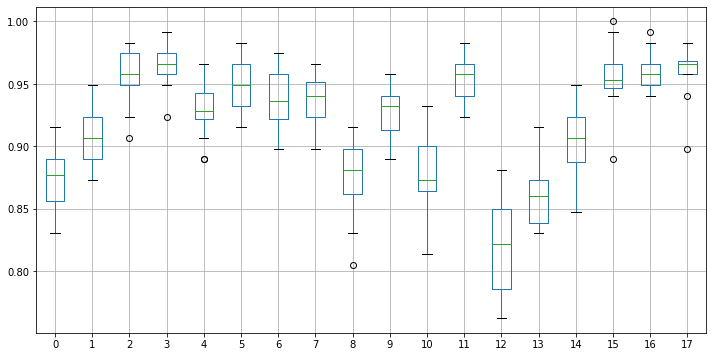

In [3]:
accuracy_DF.boxplot(figsize=(12, 6))
describe_DF = accuracy_DF.describe().transpose().sort_values(by='mean', ascending=False)
describe_DF

## Salvando rank em arquivo npy

In [4]:
np.save('./chb03_rank.npy', describe_DF.index)